## Import Libraries

In [55]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

## Load dataset

In [4]:
yulu_data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv")
yulu_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [50]:
yulu_data.shape

(10886, 12)

In [5]:
yulu_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

## Outlier detection

In [60]:
yulu_data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

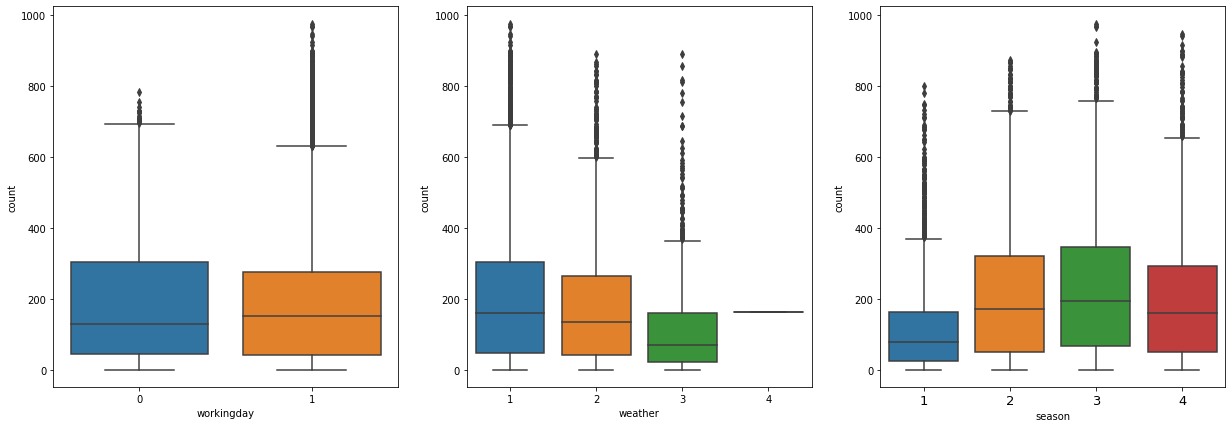

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
sns.boxplot(x = 'workingday', y = 'count', data=yulu_data, ax=ax1)
sns.boxplot(x = 'weather', y = 'count', data=yulu_data, ax=ax2)
sns.boxplot(x = 'season', y = 'count', data=yulu_data, ax=ax3)
plt.xticks(fontsize= 13)

C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


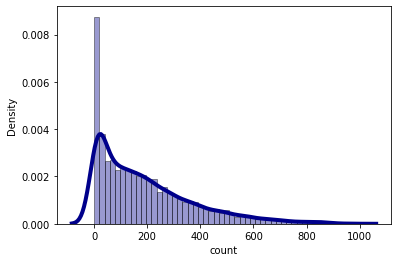

In [62]:
sns.distplot(yulu_data['count'], hist=True, kde=True,
        bins=int(50), color = 'darkblue',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
plt.show()

## *Correlation among data* ##

<AxesSubplot:>

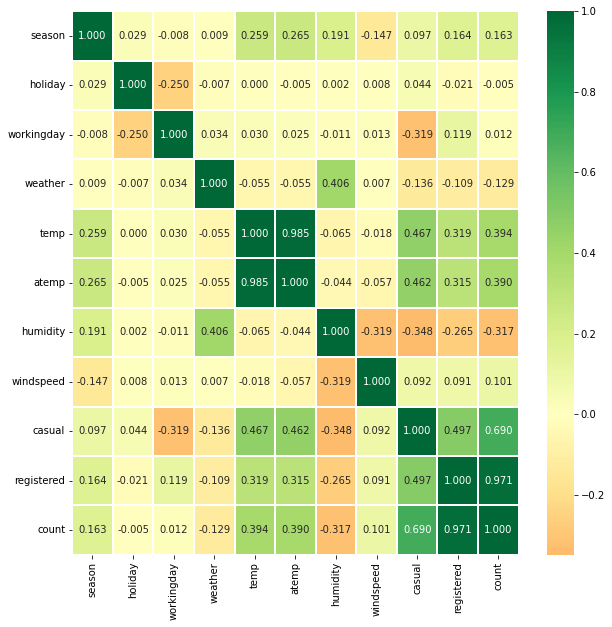

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(yulu_data.corr(), cmap="RdYlGn", center=0, annot=True, linewidths=2, fmt='.3f', ax=ax)

In [63]:
def dist_box_violin(data):
# function plots a combined graph for univariate analysis of continous variable
#to check spread, central tendency , dispersion and outliers
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)
    plt.show()

C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


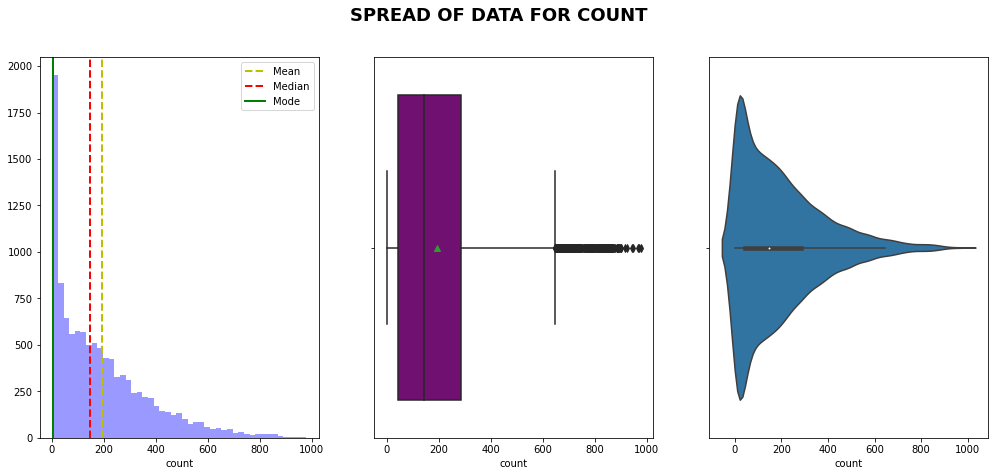

In [64]:
dist_box_violin(yulu_data["count"])

## Analysis data based on category

<AxesSubplot:xlabel='count', ylabel='Count'>

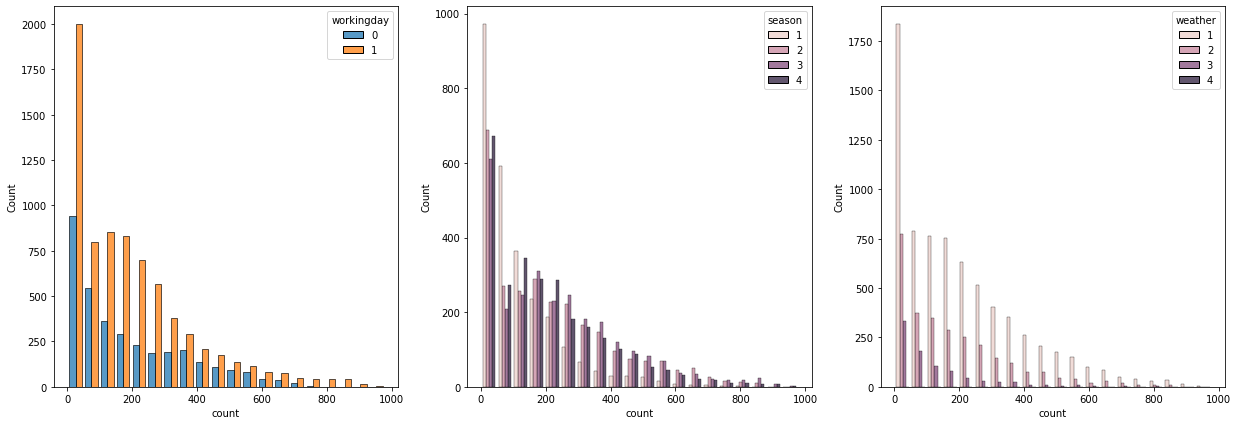

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))

# binnedPopulation = pd.cut(x=df['monthly_salary'], bins=20) 
# binnedPopulation.value_counts(normalize=True)

sns.histplot(data=yulu_data, x="count", hue="workingday", multiple="dodge", shrink=.8, bins=20, ax=ax1)
sns.histplot(data=yulu_data, x="count", hue="season", multiple="dodge", shrink=.8, bins=20, ax=ax2)
sns.histplot(data=yulu_data, x="count", hue="weather", multiple="dodge", shrink=.8, bins=20, ax=ax3)


C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

<AxesSubplot:xlabel='humidity', ylabel='Density'>

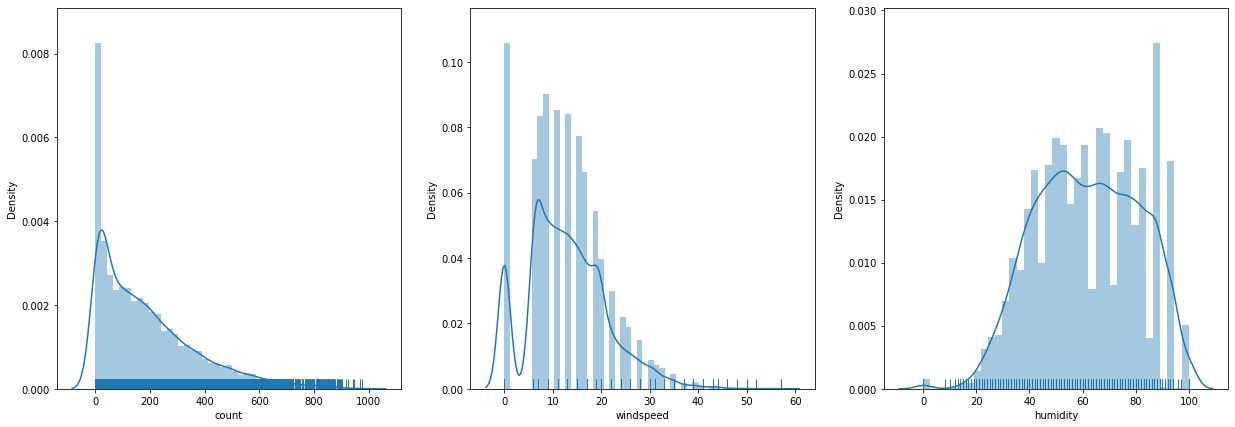

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
sns.distplot(yulu_data['count'],  rug=True, ax=ax1)
sns.distplot(yulu_data['windspeed'],  rug=True, ax=ax2)
sns.distplot(yulu_data['humidity'],  rug=True, ax=ax3)

## Two- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

##### H0-Working days has effect on count of electric cycle rented
##### Ha-Working days has no effect on count of electric cycle rented

In [7]:
working_day0 = yulu_data[yulu_data["workingday"] == 0]
working_day1 = yulu_data[yulu_data["workingday"] == 1]

In [8]:
working_day0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10809,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109
10810,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122
10811,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106
10812,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89


In [9]:
working_day1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [13]:
#2 Sample T test
stats.ttest_ind(working_day0["count"], working_day1["count"])

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

P-Value is less than alpha (0.5), so rejecting Null Hypothesis.

Accepting alternate hypothesis. the result is "Working days has no effect on count of electric cycle rented"

## ANNOVA

## No. of cycles rented is similar or different in weather

##### H0-No of cycles rented in all weather is same
##### Ha-No of cycles rented in all weather are not same

In [23]:
yulu_data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [25]:
weather1 = yulu_data[yulu_data["weather"] == 1]
weather2 = yulu_data[yulu_data["weather"] == 2]
weather3 = yulu_data[yulu_data["weather"] == 3]
weather4 = yulu_data[yulu_data["weather"] == 4]

In [28]:
f_oneway(weather1['count'], weather2['count'], weather3['count'], weather4['count'])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

### Result

The F statistic and p-value turn out to be equal to 65.53024112793271 and 5.482069475935669e-42 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the number of cycles rented in different weather

## No. of cycles rented is similar or different in season

##### H0-No of cycles rented in all season is same
##### Ha-No of cycles rented in all season are not same

In [20]:
yulu_data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [29]:
season1 = yulu_data[yulu_data["season"] == 1]
season2 = yulu_data[yulu_data["season"] == 2]
season3 = yulu_data[yulu_data["season"] == 3]
season4 = yulu_data[yulu_data["season"] == 4]

In [30]:
f_oneway(season1['count'], season2['count'], season3['count'], season4['count'])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

### Result

The F statistic and p-value turn out to be equal to 236.94671081032106 and 6.164843386499654e-149 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the number of cycles rented in different season

## Chi-square test to check if Weather is dependent on the season

##### H0: States that there is no relation between weather and season.
##### Ha: State that there is a significant relation between weather and season.

In [45]:
observed_data = np.array([yulu_data["weather"], yulu_data["season"]])
observed_data.size

21772

In [46]:
stat, p, dof, expected = chi2_contingency(observed_data)
p

1.0

In [47]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


### Result

Since the p-value is greater than 0.05 hence we would accept the null hypothesis. This implies that we have sufficient proof to say that there exists a no relation between weather and season